In [1]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import scienceplots

In [3]:
def find_overlap(horizon, step):
    overlap = [i for i in range(step,horizon)]
    return overlap

def sMAPC(y_forecast, y_forecast_previous):
    h = len(y_forecast)
    if h != len(y_forecast_previous):
        raise ValueError("Input lists must have the same length")
    s_mapc = 0
    for i in range(1, h):
        numerator = abs(y_forecast[i] - y_forecast_previous[i])
        denominator = abs(y_forecast[i]) + abs(y_forecast_previous[i])
        s_mapc += numerator / denominator
    s_mapc *= (200 / (h - 1))
    return s_mapc

def MAC(y_forecast, y_forecast_previous):
    h = len(y_forecast)
    if h != len(y_forecast_previous):
        raise ValueError("Input lists must have the same length")
    mac = 0
    for i in range(h):
        numerator = abs(y_forecast[i] - y_forecast_previous[i])
        mac += numerator
    mac /= (h)
    return mac

In [4]:
def generate_lists(step, horizon):
    previous_list = np.arange(step, horizon)
    current_list = np.arange(horizon - step)
    return previous_list, current_list

In [5]:
phase_num = 1
#sMAPC_steps = {}
MAC_steps = {}
#sMAPC_steps_dict = {}
MAC_steps_dict = {}
for step_forecast in range(1, 24):
    #sMAPC_steps[step_forecast] = {}
    MAC_list = [0] * 24
    log = pd.read_csv(f'debug_logs/scen_gurobi_phase_{phase_num}_step_leap_1_forecast_step_{step_forecast}.csv', index_col='time_step')
    log.drop(columns=['building', 'scenario'], inplace=True)
    for i, col in enumerate(log.columns[:-1]):
        MAC_list[i] = np.mean(np.abs(log.iloc[:,i] - log.iloc[:,i+1]))
    MAC_steps_dict[step_forecast] = np.mean(MAC_list).round(6)

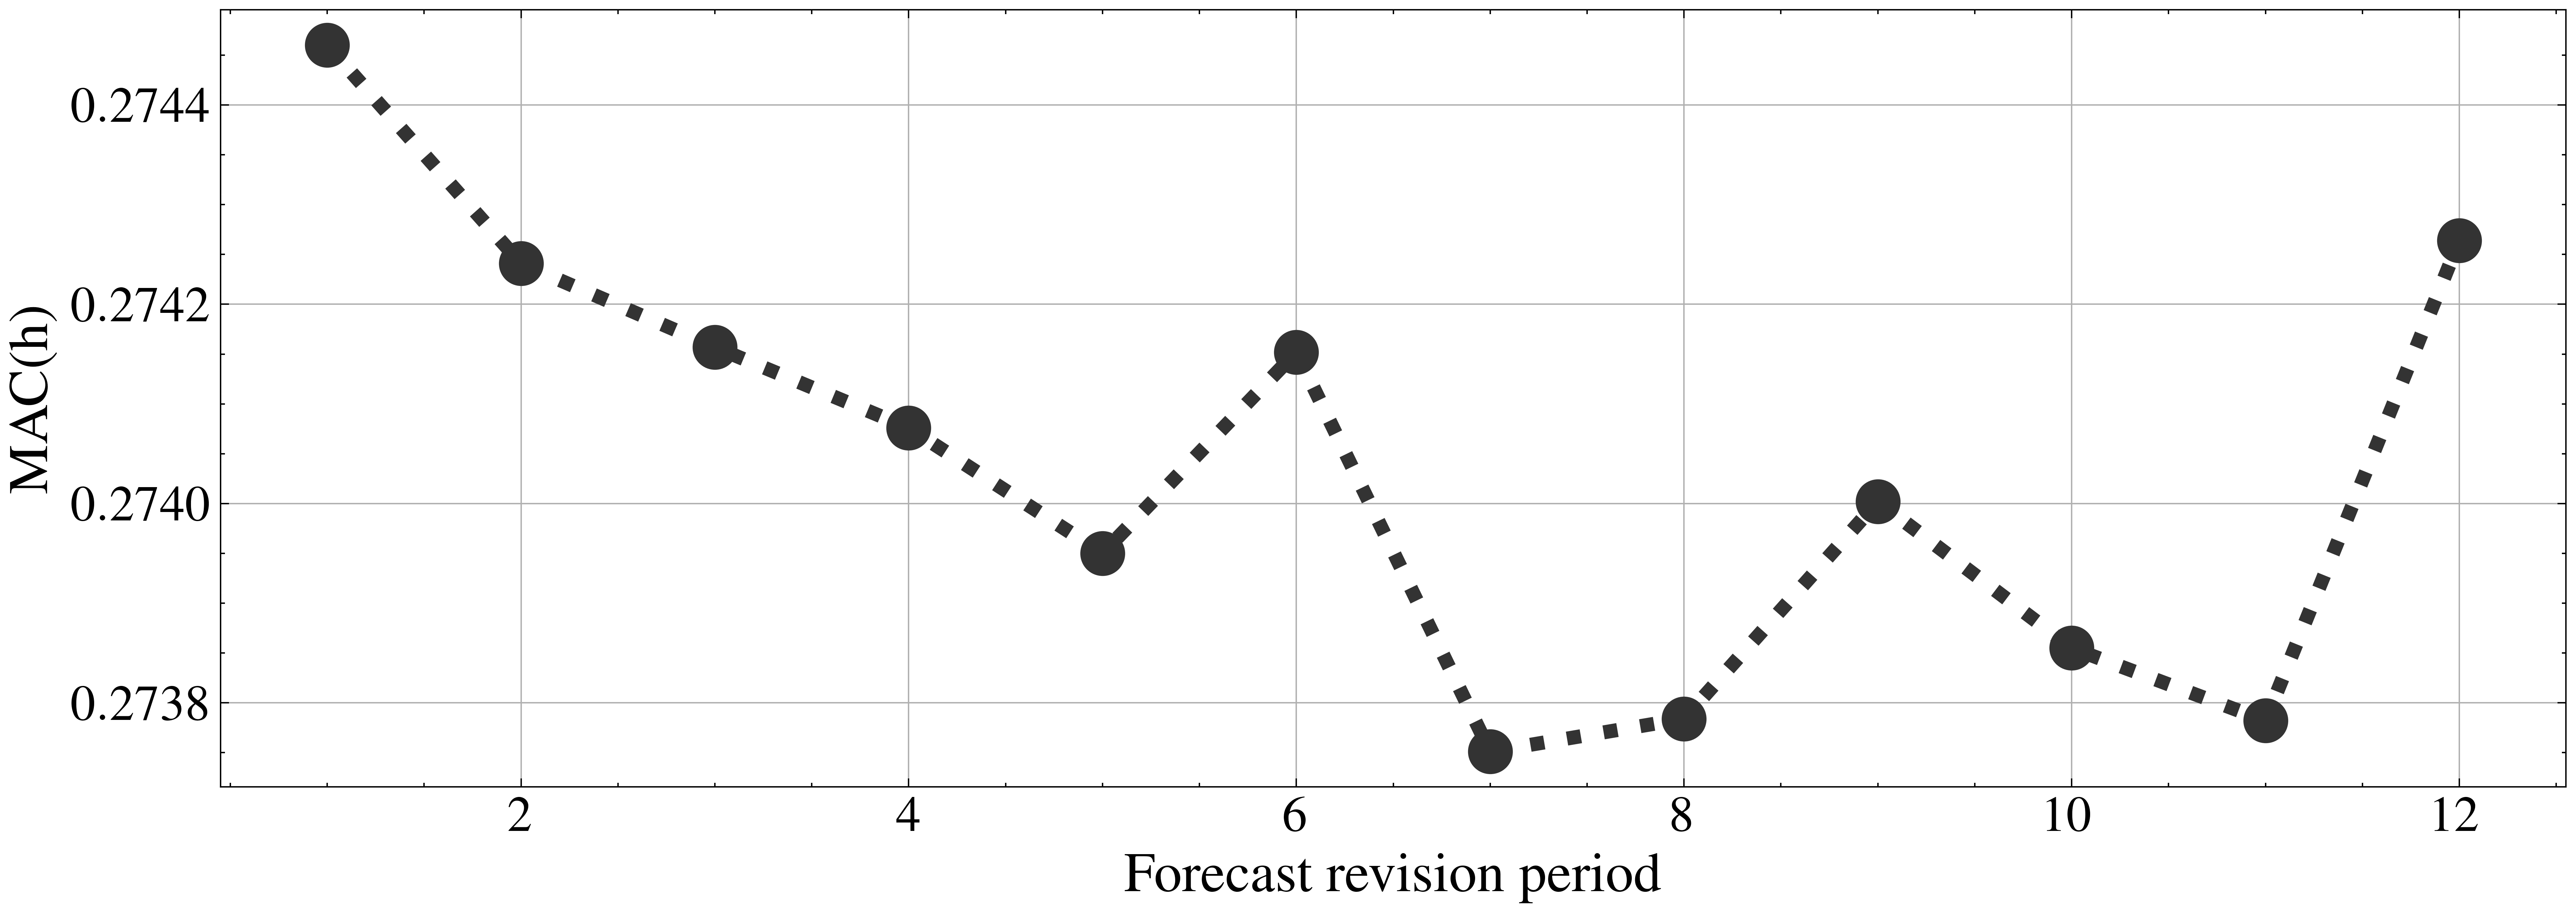

In [6]:
# seaborn darkgrid style style
plt.style.use(['science','ieee'])
# plot just the MAC
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(list(MAC_steps_dict.keys())[:12], list(MAC_steps_dict.values())[:12], marker='o', linestyle='dotted', label='In-sample'
        , linewidth=5, markersize=15, color='#333333')
# make x ticks bigger
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('Forecast revision period', fontsize=20)
ax.set_ylabel('MAC(h)', fontsize=20)
ax.grid()
#ax.set_title(f'Forecast stability (MAC) vs forecast deployment step (In-sample)', fontsize=16)
plt.show()

In [13]:
phase_num = 3
#sMAPC_steps = {}
MAC_steps = {}
#sMAPC_steps_dict = {}
MAC_steps_dict = {}
for step_forecast in range(1, 24):
    #sMAPC_steps[step_forecast] = {}
    MAC_list = [0] * 24
    log = pd.read_csv(f'debug_logs/scen_gurobi_phase_{phase_num}_step_leap_1_forecast_step_{step_forecast}.csv', index_col='time_step')
    log.drop(columns=['building', 'scenario'], inplace=True)
    for i, col in enumerate(log.columns[:-1]):
        MAC_list[i] = np.mean(np.abs(log.iloc[:,i] - log.iloc[:,i+1]))
    MAC_steps_dict[step_forecast] = np.mean(MAC_list).round(6)

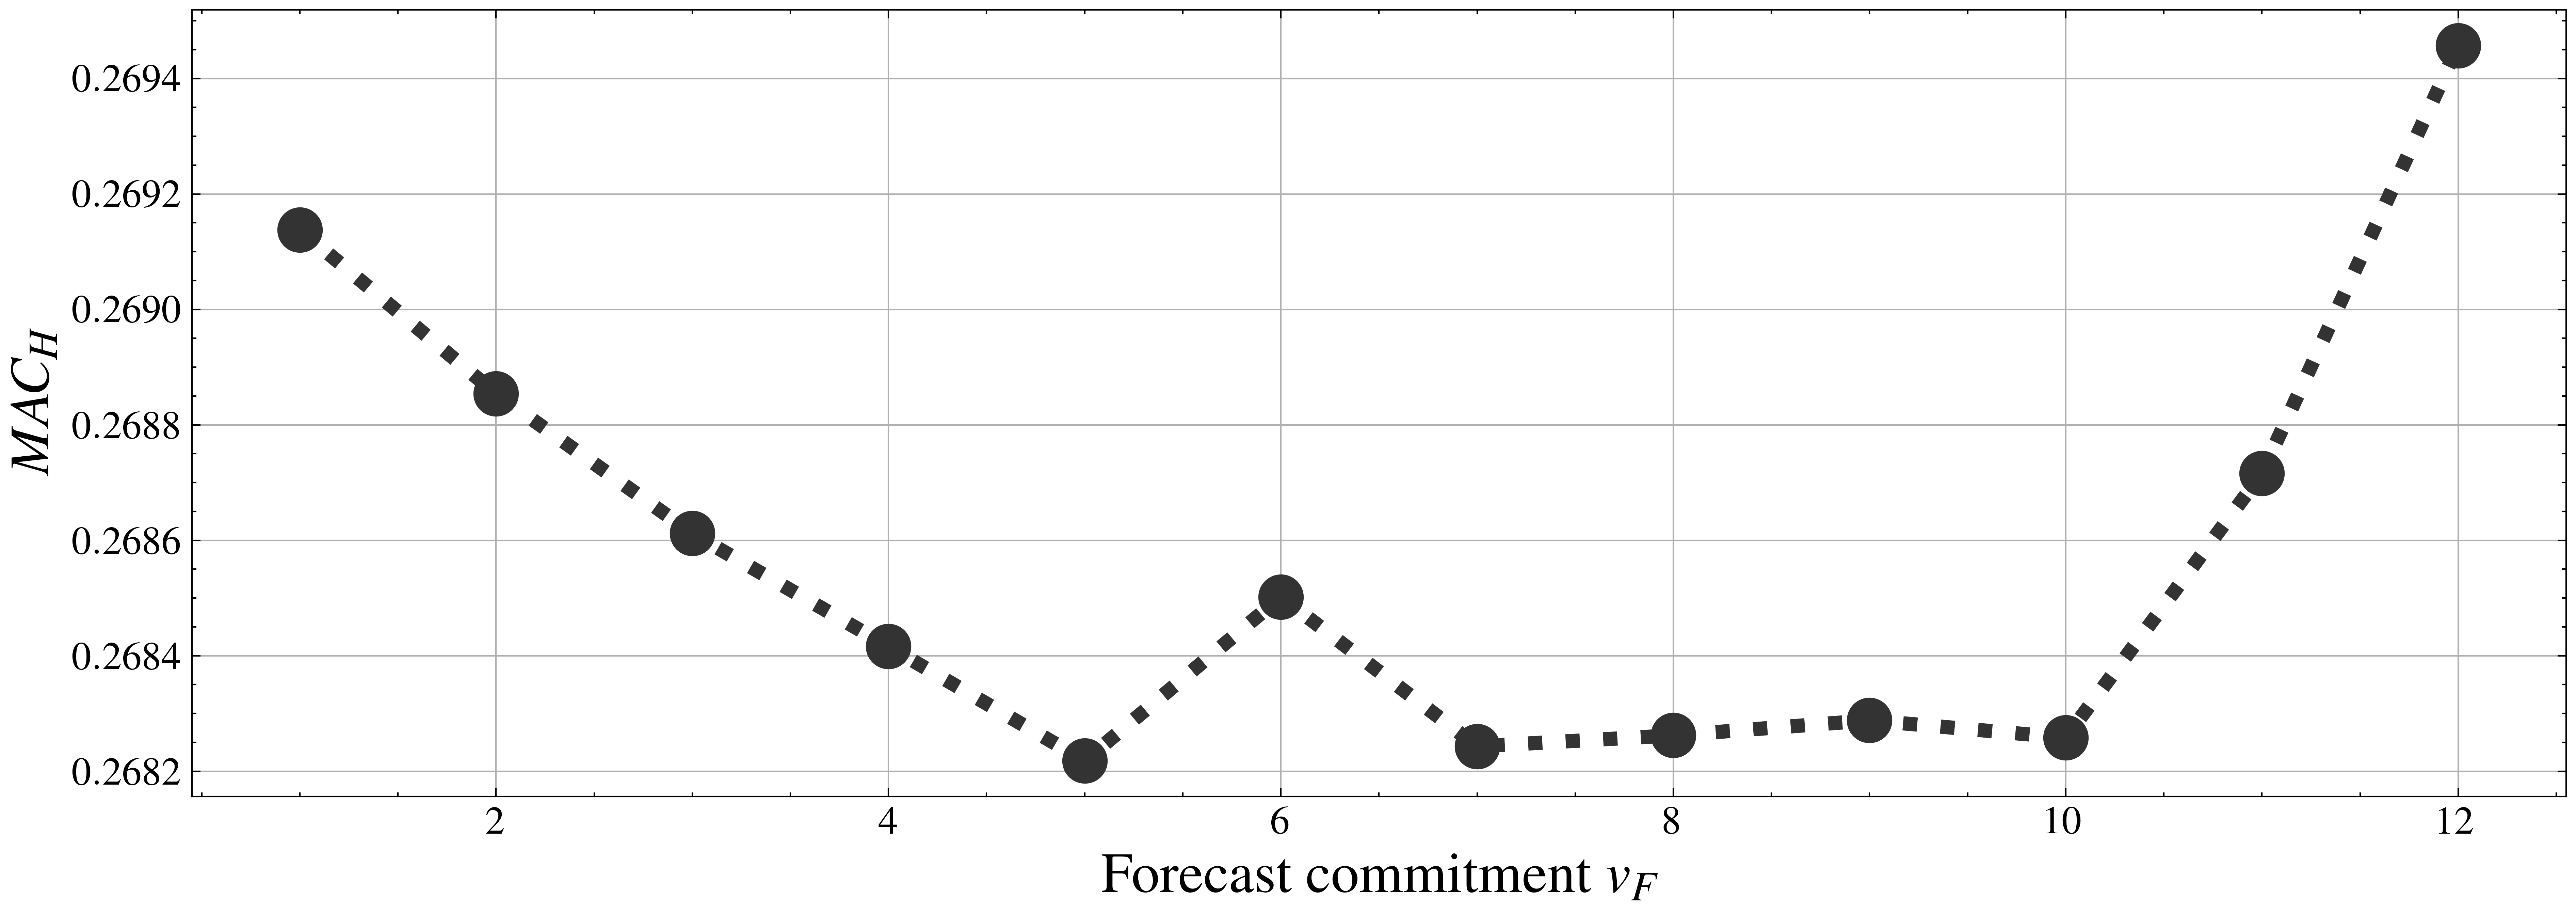

In [14]:
# seaborn darkgrid style style
plt.style.use(['science','ieee'])
# plot just the MAC
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(list(MAC_steps_dict.keys())[:12], list(MAC_steps_dict.values())[:12], marker='o', linestyle='dotted', label='In-sample'
        , linewidth=5, markersize=15, color='#333333')
# color dark grey

# make x ticks bigger
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax.set_xlabel('Forecast commitment $v_{F}$', fontsize=20)
ax.set_ylabel('$MAC_{H}$', fontsize=20)
ax.grid()
#ax.set_title(f'Forecast stability (MAC) vs forecast deployment step (In-sample)', fontsize=16)
plt.show()

In [15]:
# ts_dict to dataframe
df = pd.DataFrame.from_dict(MAC_steps_dict, orient='index', columns=['MAC_H'])
# save to csv
df.to_csv("results/P3_MAC_H.csv")